In [1]:
import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from mlxtend.plotting import plot_learning_curves
from mlxtend.preprocessing import shuffle_arrays_unison
import keras
import keras.utils
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import regularizers,optimizers

print(os.getcwd())
print("Modules imported \n")
import os

/home/ronaldsonbellande/Desktop/Healthcare Data Analytics/HealthCare Analysis Self/Healthcare-Data-Analytics/Disease Analysis
Modules imported 



In [4]:
mimic_data = pd.read_csv('mimic3d.csv')
data_full = mimic_data.drop('hadm_id', 1)
print("With ID", mimic_data.shape)
print("Without ID",data_full.shape)

With ID (58976, 28)
Without ID (58976, 27)


In [5]:
data_full.info()
data_full.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            58976 non-null  object 
 1   age               58976 non-null  int64  
 2   LOSdays           58976 non-null  float64
 3   admit_type        58976 non-null  object 
 4   admit_location    58976 non-null  object 
 5   AdmitDiagnosis    58951 non-null  object 
 6   insurance         58976 non-null  object 
 7   religion          58518 non-null  object 
 8   marital_status    48848 non-null  object 
 9   ethnicity         58976 non-null  object 
 10  NumCallouts       58976 non-null  float64
 11  NumDiagnosis      58976 non-null  float64
 12  NumProcs          58976 non-null  float64
 13  AdmitProcedure    58976 non-null  object 
 14  NumCPTevents      58976 non-null  float64
 15  NumInput          58976 non-null  float64
 16  NumLabs           58976 non-null  float6

,age,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
count,58976.000000,58976.000000,58976.000000,58976.00000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,53.005884,10.114955,0.099374,2.67596,0.785599,1.074118,30.379017,46.421124,1.219913,6.464789,7.111594,9.593702,0.691903,1.093313,528.505172,0.099261,636.115579,1.360248
std,26.028120,12.456231,0.163437,8.26559,3.558090,2.027148,62.430163,76.061561,4.236693,106.709903,7.551822,12.601338,2.117615,3.169441,640.250063,0.299014,783.938087,1.130337
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,3.710000,0.000000,0.82000,0.210000,0.000000,4.850000,26.980000,0.160000,0.140000,1.750000,4.330000,0.000000,0.380000,207.410000,0.000000,267.407500,0.000000
50%,59.000000,6.460000,0.000000,1.41000,0.420000,0.970000,13.990000,38.520000,0.510000,0.330000,5.310000,8.370000,0.000000,0.650000,417.875000,0.000000,497.335000,1.000000
75%,73.000000,11.790000,0.160000,2.40000,0.710000,1.560000,34.360000,50.860000,1.350000,0.770000,10.490000,12.270000,0.880000,1.060000,700.302500,0.000000,811.382500,2.000000
max,89.000000,294.630000,4.760000,450.00000,275.000000,225.000000,6825.000000,5175.000000,375.000000,7500.000000,375.000000,750.000000,100.000000,125.000000,49325.000000,1.000000,68600.000000,3.000000


In [6]:
data_full.head(10)

,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,ethnicity,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,WHITE,...,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,1
1,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,WHITE,...,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,1
2,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,...,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,3
3,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,WHITE,...,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,1
4,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,WHITE,...,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,1
5,F,54,4.38,ELECTIVE,PHYS REFERRAL/NORMAL DELI,RENAL MASS LEFT/SDA,Private,EPISCOPALIAN,MARRIED,WHITE,...,0.00,0.11,7.99,9.13,1.14,0.91,448.63,0,509.00,1
6,M,21,14.38,EMERGENCY,CLINIC REFERRAL/PREMATURE,MOTOR VEHICLE ACCIDENT WITH UNSPECIFIED INJURIES,Medicaid,NOT SPECIFIED,SINGLE,HISPANIC OR LATINO,...,1.88,0.21,18.01,9.94,4.10,0.21,1337.13,0,1482.53,3
7,M,67,10.08,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Medicare,CATHOLIC,MARRIED,WHITE,...,0.30,0.15,15.48,14.48,2.28,0.60,524.11,0,618.11,2
8,F,49,0.63,ELECTIVE,PHYS REFERRAL/NORMAL DELI,RIGHT SHOULDER ADHESIVE CAPSULITIS/SDA,Medicaid,CATHOLIC,SINGLE,WHITE,...,0.00,0.00,0.00,0.00,0.00,4.76,0.00,0,25.39,0
9,M,55,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,PNEUMONIA,Medicare,PROTESTANT QUAKER,SINGLE,WHITE,...,0.81,0.21,16.53,10.05,1.13,0.49,1221.39,0,1315.92,1


In [7]:
y = data_full['LOSgroupNum']
X = data_full.drop('LOSgroupNum', 1)
X = X.drop('LOSdays', 1)
X = X.drop('ExpiredHospital', 1)
X = X.drop('AdmitDiagnosis', 1)
X = X.drop('AdmitProcedure', 1)
X = X.drop('marital_status', 1)
X = X.drop('ethnicity', 1)
X = X.drop('religion', 1)
X = X.drop('insurance', 1)

print("y - With Labels", y)
print("X - With no Labels and no ID ", X)

y - With Labels 0        1
1        1
2        3
3        1
4        1
        ..
58971    3
58972    2
58973    3
58974    1
58975    1
Name: LOSgroupNum, Length: 58976, dtype: int64
X - With no Labels and no ID        gender  age admit_type             admit_location  NumCallouts  \
0          F   35  EMERGENCY  CLINIC REFERRAL/PREMATURE         0.16   
1          M   59  EMERGENCY       EMERGENCY ROOM ADMIT         0.25   
2          F   48  EMERGENCY       EMERGENCY ROOM ADMIT         0.00   
3          F   73  EMERGENCY       EMERGENCY ROOM ADMIT         0.41   
4          M   60  EMERGENCY  TRANSFER FROM HOSP/EXTRAM         0.00   
...      ...  ...        ...                        ...          ...   
58971      M   60  EMERGENCY  TRANSFER FROM HOSP/EXTRAM         0.00   
58972      F   58  EMERGENCY       EMERGENCY ROOM ADMIT         0.00   
58973      M   23  EMERGENCY  PHYS REFERRAL/NORMAL DELI         0.00   
58974      M   69  EMERGENCY  TRANSFER FROM HOSP/EXTRAM         0.

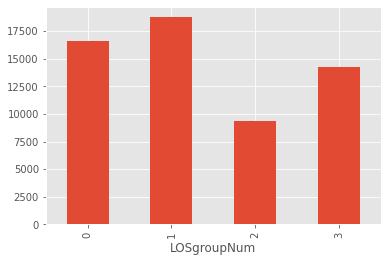

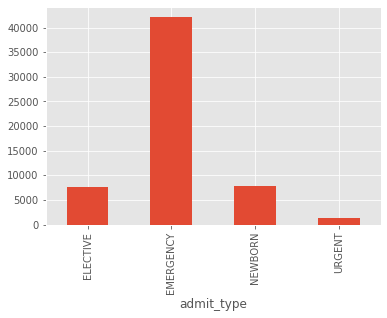

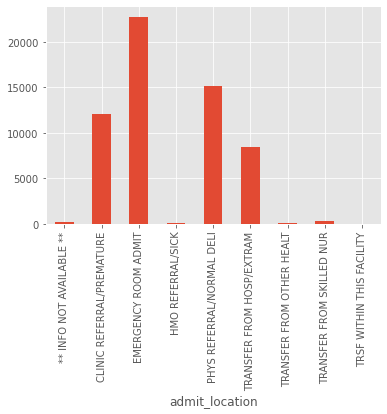

In [8]:
data_full.groupby('LOSgroupNum').size().plot.bar()
plt.show()
data_full.groupby('admit_type').size().plot.bar()
plt.show()
data_full.groupby('admit_location').size().plot.bar()
plt.show()

In [9]:
categorical_columns = [
                    'gender',                     
                    'admit_type',
                    'admit_location'
                      ]

for col in categorical_columns:
    if col in X.columns:
        one_hot_encoded = pd.get_dummies(X[col])
        X = X.drop(col, axis=1)
        X = X.join(one_hot_encoded, lsuffix='_left', rsuffix='_right')
        
print(X.shape)

(58976, 30)


In [10]:
print(data_full.shape)
print(X.shape)
X_copy = X.copy()
Y_copy = y.copy()

(58976, 27)
(58976, 30)


In [11]:
# Normalize X values 
x_value = X_copy.values
scaler = preprocessing.StandardScaler()

In [12]:
x_scaled = scaler.fit_transform(X)
X_normalized = pd.DataFrame(x_scaled, columns=X_copy.columns)
print(X_normalized)

            age  NumCallouts  NumDiagnosis  NumProcs  NumCPTevents  NumInput  \
0     -0.691792     0.370949     -0.010400 -0.220794      0.111429 -0.084239   
1      0.230296     0.921627     -0.053954  0.057447      0.446879 -0.268607   
2     -0.192328    -0.608032     -0.233011 -0.173015     -0.120425 -0.303045   
3      0.768180     1.900608     -0.240270 -0.144910     -0.189488 -0.161446   
4      0.268716    -0.608032      0.122683  0.009668      0.580072 -0.158403   
...         ...          ...           ...       ...           ...       ...   
58971  0.268716    -0.608032     -0.278985 -0.071837     -0.066161  4.814076   
58972  0.191876    -0.608032     -0.212444 -0.105563     -0.224020  1.037984   
58973 -1.152835    -0.608032     -0.251159 -0.069026     -0.500273 -0.283824   
58974  0.614499    -0.608032      0.005328 -0.077458     -0.446009 -0.072546   
58975  1.344485    -0.608032     -0.038226 -0.170205      0.096630 -0.378811   

        NumLabs  NumMicroLabs  NumNotes

In [13]:
# Split into Train & Test

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

print('Y_train', y_train)
print('Y_test', y_test)

X_train:  (47180, 30)
X_test:  (11796, 30)
y_train:  (47180,)
y_test:  (11796,)
Y_train 20267    1
11968    0
13090    3
57540    3
28262    0
        ..
54343    2
38158    3
860      2
15795    1
56422    0
Name: LOSgroupNum, Length: 47180, dtype: int64
Y_test 40028    1
38143    3
14276    0
49801    0
21549    1
        ..
50194    3
41920    3
22400    2
40485    1
23098    3
Name: LOSgroupNum, Length: 11796, dtype: int64


In [14]:
# Transfer data to Neural Nework format
x_val = X_test
y_val = y_test

In [15]:
yTrain = to_categorical(y_train)
yVal = to_categorical(y_val)
print(yTrain.shape)
print(yVal.shape)

(47180, 4)
(11796, 4)


In [16]:
model = Sequential()
model.add(Dense(12, input_dim=30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))


NumEpochs = 10
BatchSize = 32
model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                372       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 8         
Total params: 493
Trainable params: 493
Non-trainable params: 0
__________________________________________________________

In [17]:
mimic_model = model.fit(X_train, yTrain, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, yVal))

results = model.evaluate(x_val, yVal)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)

Epoch 1/10
1475/1475 [==============================] - 5s 3ms/step - loss: 1.3797 - categorical_accuracy: 0.2547 - val_loss: 1.3662 - val_categorical_accuracy: 0.2646
Epoch 2/10
1475/1475 [==============================] - 4s 3ms/step - loss: 1.3632 - categorical_accuracy: 0.2988 - val_loss: 1.3542 - val_categorical_accuracy: 0.3687
Epoch 3/10
1475/1475 [==============================] - 4s 3ms/step - loss: 1.3541 - categorical_accuracy: 0.3316 - val_loss: 1.3454 - val_categorical_accuracy: 0.4108
Epoch 4/10
1475/1475 [==============================] - 5s 3ms/step - loss: 1.3470 - categorical_accuracy: 0.3595 - val_loss: 1.3356 - val_categorical_accuracy: 0.4262
Epoch 5/10
1475/1475 [==============================] - 10s 7ms/step - loss: 1.3393 - categorical_accuracy: 0.3752 - val_loss: 1.3238 - val_categorical_accuracy: 0.4364
Epoch 6/10
1475/1475 [==============================] - 9s 6ms/step - loss: 1.3297 - categorical_accuracy: 0.3874 - val_loss: 1.3087 - val_categorical_accuracy

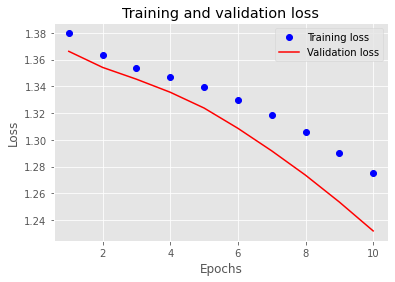

In [18]:
plt.clf()
model_dict = mimic_model.history
loss_values = model_dict['loss']
val_loss_values = model_dict['val_loss']
epochs = range(1, (len(model_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

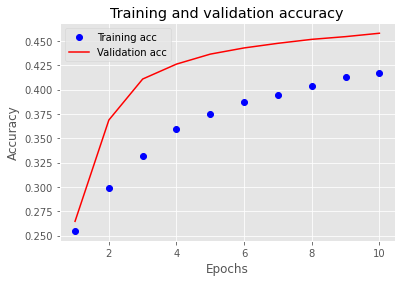

In [19]:
plt.clf()
acc_values = model_dict['categorical_accuracy']
val_acc_values = model_dict['val_categorical_accuracy']
epochs = range(1, (len(model_dict['categorical_accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
model = Sequential()
model.add(Dense(12, input_dim=30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                372       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                

In [21]:
NumEpochs = 100
BatchSize = 32

model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

mimic_model = model.fit(X_train, yTrain, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, yVal))

results = model.evaluate(x_val, yVal)
print("_"*150)
print("Test Loss and Accuracy")
print("results ", results)

Epoch 1/100
1475/1475 [==============================] - 13s 9ms/step - loss: 1.4569 - categorical_accuracy: 0.1776 - val_loss: 1.4166 - val_categorical_accuracy: 0.2362
Epoch 2/100
1475/1475 [==============================] - 12s 8ms/step - loss: 1.3965 - categorical_accuracy: 0.2482 - val_loss: 1.3791 - val_categorical_accuracy: 0.2817
Epoch 3/100
1475/1475 [==============================] - 12s 8ms/step - loss: 1.3709 - categorical_accuracy: 0.2960 - val_loss: 1.3648 - val_categorical_accuracy: 0.3173
Epoch 4/100
1475/1475 [==============================] - 12s 8ms/step - loss: 1.3619 - categorical_accuracy: 0.3176 - val_loss: 1.3600 - val_categorical_accuracy: 0.3173
Epoch 5/100
1475/1475 [==============================] - 12s 8ms/step - loss: 1.3581 - categorical_accuracy: 0.3189 - val_loss: 1.3586 - val_categorical_accuracy: 0.3173
Epoch 6/100
1475/1475 [==============================] - 11s 7ms/step - loss: 1.3571 - categorical_accuracy: 0.3186 - val_loss: 1.3583 - val_categoric

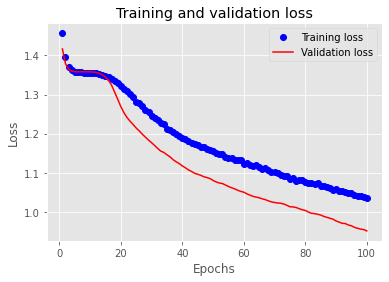

In [22]:
plt.clf()
model_dict  = mimic_model.history
loss_values = model_dict['loss']
val_loss_values = model_dict['val_loss']
epochs = range(1, (len(model_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

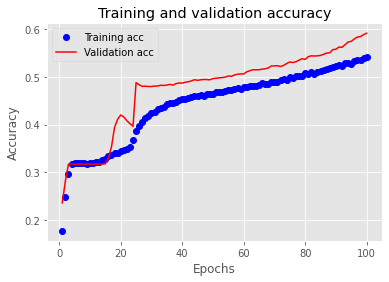

In [23]:
plt.clf()
acc_values = model_dict['categorical_accuracy']
val_acc_values = model_dict['val_categorical_accuracy']
epochs = range(1, (len(model_dict['categorical_accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [2]:
model = Sequential()
model.add(Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(30,)))
model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              63488     
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 8

In [2]:
NumEpochs = 10
BatchSize = 64

model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

mimic_model = model.fit(X_train, yTrain, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, yVal))

results = model.evaluate(x_val, yVal)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)

NameError: name 'model' is not defined

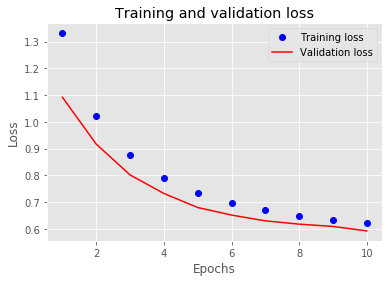

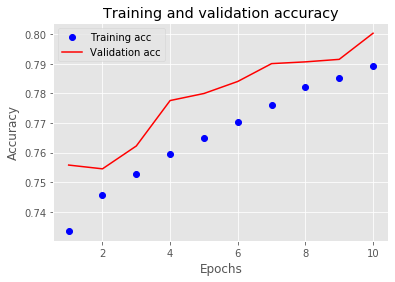

In [55]:
plt.clf()
model_dict = mimic_model.history
loss_values = model_dict['loss']
val_loss_values = model_dict['val_loss']
epochs = range(1, (len(model_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc_values = model_dict['categorical_accuracy']
val_acc_values = model_dict['val_categorical_accuracy']
epochs = range(1, (len(model_dict['categorical_accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [57]:
final_predictions = model.predict(x_val)
pred = []
numTest = final_predictions.shape[0]
for i in range(numTest):
    pred.append(np.argmax(final_predictions[i])) 
predictions = np.array(pred)  
print(predictions)

[[2.1957994e-02 5.9119976e-01 2.9627523e-01 9.0567023e-02]
 [9.5964439e-04 3.2100778e-03 1.0231898e-01 8.9351124e-01]
 [8.5768002e-01 1.4164378e-01 6.5864134e-04 1.7627246e-05]
 ...
 [1.6786383e-03 7.8756228e-02 5.0389296e-01 4.1567221e-01]
 [3.9304439e-03 9.4661117e-01 4.6564888e-02 2.8934919e-03]
 [5.8765630e-03 5.1510572e-03 7.7139117e-02 9.1183329e-01]]
[1 3 0 ... 2 1 3]


In [58]:
print(yVal)
pred = []
numTest = yVal.shape[0]
for i in range(numTest):
    pred.append(np.argmax(yVal[i])) 
yValNum = np.array(pred)  
print(yValNum)

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
[1 3 0 ... 2 1 3]


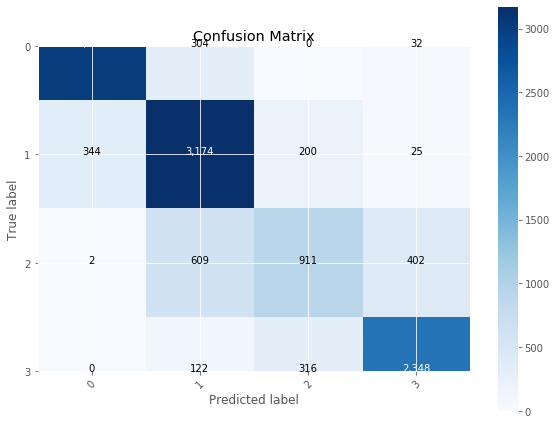

In [63]:
confusion_mx = confusion_matrix(yValNum, predictions)
def plot_confusion_matrix(cm,target_names,title='Confusion Matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


    
plot_confusion_matrix(confusion_mx, 
                      normalize    = False,
                      target_names = [0,1,2,3],
                      title        = "Confusion Matrix")

Class  0


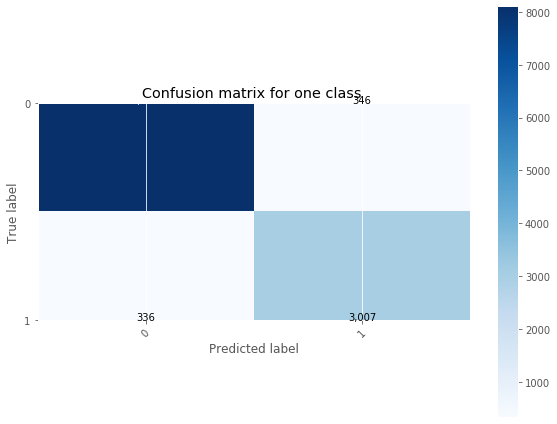

TPz  3007
FNz  336
FPz  346
TNz  8107
sum  11796
[[8107  346]
 [ 336 3007]]
Sum of CM  11796
accuracy  0.9422
recall  0.8995
precision  0.8968
F1Score  0.8981
----------------------------------------
Class  1


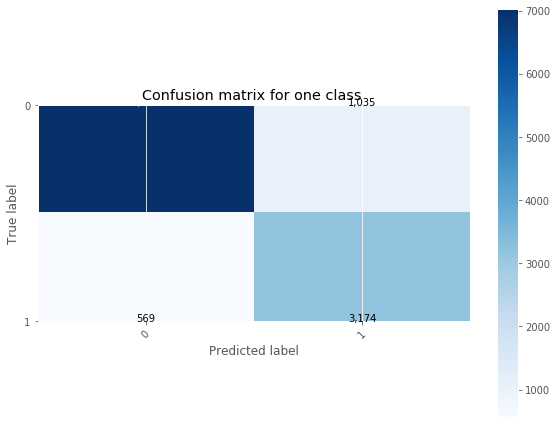

TPz  3174
FNz  569
FPz  1035
TNz  7018
sum  11796
[[7018 1035]
 [ 569 3174]]
Sum of CM  11796
accuracy  0.864
recall  0.848
precision  0.7541
F1Score  0.7983
----------------------------------------
Class  2


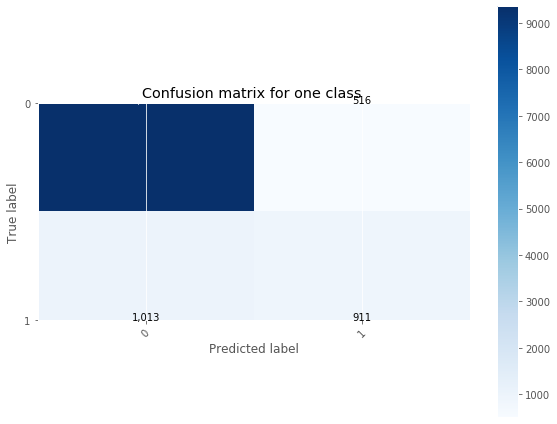

TPz  911
FNz  1013
FPz  516
TNz  9356
sum  11796
[[9356  516]
 [1013  911]]
Sum of CM  11796
accuracy  0.8704
recall  0.4735
precision  0.6384
F1Score  0.5437
----------------------------------------
Class  3


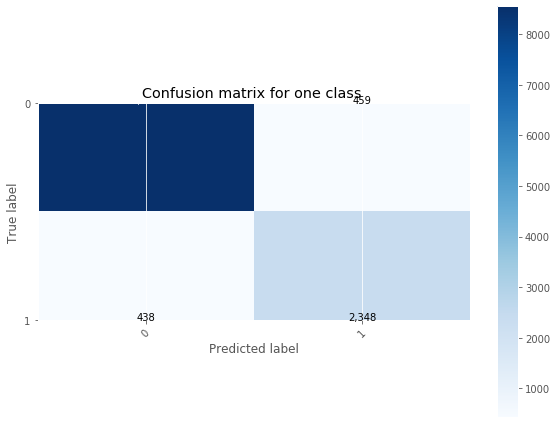

TPz  2348
FNz  438
FPz  459
TNz  8551
sum  11796
[[8551  459]
 [ 438 2348]]
Sum of CM  11796
accuracy  0.924
recall  0.8428
precision  0.8365
F1Score  0.8396
----------------------------------------


In [64]:
NumClasses = 4

TP = 0
TN = 0
FP = 0
FN = 0

for z in range(NumClasses):
# One class at a time - calculate confusion matrix
    SumCM = np.sum(conf_mx)
    TPz = conf_mx[z,z]
    FNz = np.sum(conf_mx[z,:], axis=0) -TPz
    FPz = np.sum(conf_mx[:,z], axis=0) -TPz
    TNz = SumCM - (TPz+FNz+FPz)
    print('Class ',z)
    cmZ = np.zeros([2, 2], dtype=np.int32)
    cmZ[0,0] = TNz
    cmZ[0,1] = FPz
    cmZ[1,0] = FNz
    cmZ[1,1] = TPz

    plot_confusion_matrix(cmZ, 
                          normalize    = False,
                          target_names = [0,1],
                          title        = "Confusion matrix for one class ")

    accuracy = (TPz+TNz)/(TPz+TNz+FPz+FNz)
    recall = TPz/(TPz+FNz)
    precision = TPz/(TPz+FPz)
    f1score = 2*recall*precision/(recall+precision)
    
    print('TPz ',TPz)
    print('FNz ',FNz)
    print('FPz ',FPz)
    print('TNz ',TNz)
    print('sum ', TPz+TNz+FPz+FNz)
    print(cmZ)
    print('Sum of CM ', np.sum(cmZ))
    print ('accuracy ',round(accuracy,4))
    print('recall ', round(recall,4))
    print('precision ', round(precision,4))
    print('F1Score ', round(f1score,4))
    print('-'*40)
    
    TP = TP + TPz
    TN = TN + TNz
    FP = FP + FPz
    FN = FN + FNz
    

Confusion Matix for ALL Classes


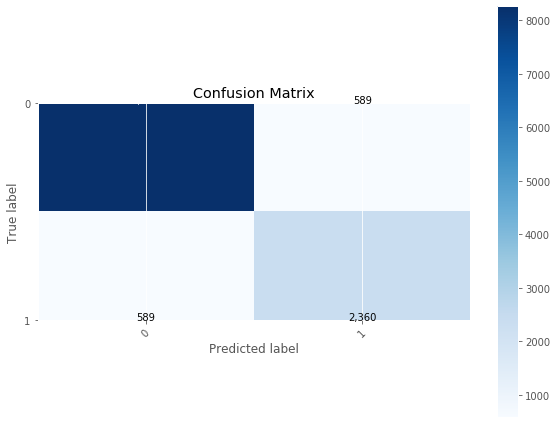

In [65]:
TP = TP / NumClasses
TN = TN / NumClasses
FP = FP / NumClasses
FN = FN / NumClasses


cm = np.zeros([2, 2], dtype=np.int32)
cm[0,0] = TN
cm[0,1] = FP
cm[1,0] = FN
cm[1,1] = TP

plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = [0,1],
                      title        = "Confusion Matrix")
